# <a href="https://thetahat.ru/courses/ad">Введение в анализ данных</a>
## Домашнее задание 3, <font color="blue">легкая часть</font>. Линейная и логистическая регрессии.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@thetahat_ds25_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**. Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания всем участникам списывания дается штраф -2 балла к итоговой оценке за семестр.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Обратите внимание на <a href="https://thetahat.ru/courses/ai-rules"><b>правила использования ИИ-инструментов</b></a> при решении домашнего задания.
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Решение проверяется системой ИИ-проверки <a href="https://thetahat.ru/"><img src="https://miptstats.github.io/theta_grader_small.png" style="display: inline; vertical-align: middle;"></a> **ThetaGrader**. Результат проверки валидируется и исправляется человеком, после чего комментарии отправляются студентам.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.

**Правила оформления теоретических задач:**

* Решения необходимо оформить в виде $\LaTeX$ в markdown-ячейках. Иные способы (в т.ч. фотографии) не принимаются.
* Если вы не знаете $\LaTeX$, используйте ИИ-инструменты для оформления черновика решения. Примеры были показаны на лекции 2 по ИИ-инструментам.
* **В решениях поясняйте, чем вы пользуетесь**, хотя бы кратко. 
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.


<b><font size="5" color="red">Важно!!! Правила заполнения ноутбука:</font></b>
* Запрещается удалять имеющиеся в ноутбуке ячейки, менять местами положения задач.
* Сохраняйте естественный линейный порядок повествования в ноутбуке сверху-вниз.
* Отвечайте на вопросы, а также добавляйте новые ячейки в предложенных местах, которые обозначены `<...>`.
* В markdown-ячейка, содержащих описание задачи, находятся специальные отметки, которые <font color="red"><b>запрещается модифицировать</b></font>.
* При нарушении данных правил работа может получить 0 баллов.


**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):

* Задача 1 &mdash; 20 баллов
* Задача 2 &mdash; 80 баллов
* Задача 3 &mdash; 30 баллов;
* Задача 4 &mdash; 20 баллов;

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):

* Задачи 5-7: скачайте второй ноутбук с условием задания со страницы курса.

Баллы учитываются в <b>обязательной части</b> курса и не влияют на оценку по факультативной части.

In [25]:
# Bot check

# HW_ID: fpmi_ad3_part1
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mercantile import feature
from sympy.abc import theta

sns.set(style="whitegrid", palette="Set2")

При решении задания используйте `sklearn`. Пропишите сюда необходимые импорты

In [6]:
from sklearn.model_selection import train_test_split
import matplotlib.ticker as mticker
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.linear_model import LogisticRegression

---
### <font color="blue"><i>Легкая часть</i></font>

---
### Задача 1.

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 146d04157c07b08ee58d3eafdcf82c32 -->
Рассмотрим модель одномерной линейной регрессии *без свободного параметра* $y(x) = \theta x$, где $x\in \mathbb{R}$ и $\theta \in \mathbb{R}$. Предполагаем, что данные получены по правилу
$$Y_i = \theta x_i + \varepsilon_i,$$
где $i \in \{1, ..., n\}$, числа $x_i \in \mathbb{R}$ неслучайны, а $\varepsilon_i$ &mdash; случайные ошибки.

**1.** Посчитайте оценку $\widehat{\theta}$ методом наименьших квадратов по явной формуле.

**2.** Выпишите формулы итераций градиентного спуска (GD) и стохастического градиентного спуска (SGD) для поиска $\widehat{\theta}$. Не забудьте указать, как в SGD математически определяется батч (набор объектов на каждой итерации).

**3.** Опишите, что произойдет, если для некоторого $i$ ошибка $\varepsilon_i$ будет очень большой.


*Замечания.*
1. Это теоретическая задача, не перепутайте 😄
2. В ответе во всех пунктах могут оставаться суммы $n$ слагаемых, но не должно быть операций с векторами или матрицами.
3. **Прочитайте требования к формату решения в правилах сдачи задания.**

**Решение:**

Рассмотрим модель без свободного члена:

$$
y_i = \theta\,x_i + \varepsilon_i,\quad i = 1,\dots,n.
$$

Здесь $x_i$ — неконстантные детерминированные числа, а $\varepsilon_i$ — случайные ошибки.

**Оценка $\hat{\theta}$ методом наименьших квадратов (МНК).**

Минимизируем сумму квадратов:

$$
S(\theta) = \sum_{i=1}^n \bigl(y_i - \theta\,x_i\bigr)^2.
$$

Для нахождения минимума найдём производную:

$$
\frac{dS}{d\theta} = -2 \sum_{i=1}^n x_i\,\bigl(y_i - \theta\,x_i\bigr) = 0.
$$

Отсюда

$$
\hat{\theta} = \frac{\sum_{i=1}^n x_i\,y_i}{\sum_{i=1}^n x_i^2}.
$$

**Градиентный спуск (GD).**

Вводим функцию потерь (среднеквадратичную):

$$
L(\theta) = \frac{1}{2\,n} \sum_{i=1}^n \bigl(y_i - \theta\,x_i\bigr)^2.
$$

Тогда её производная:

$$
\frac{dL}{d\theta} = -\frac{1}{n}\sum_{i=1}^n x_i\,\bigl(y_i - \theta\,x_i\bigr).
$$

На $k$-й итерации градиентного спуска выполняется обновление:

$$
\theta^{(k+1)} = \theta^{(k)} - \eta\,\frac{dL}{d\theta}\Bigl(\theta^{(k)}\Bigr)
= \theta^{(k)} + \frac{\eta}{n}\sum_{i=1}^n x_i\,\bigl(y_i - \theta^{(k)}\,x_i\bigr),
$$

где $\eta$ — шаг обучения.

**Стохастический градиентный спуск (SGD).**

Если вместо всей выборки используем лишь случайный батч (например, одну точку $(x_j,y_j)$ на итерации), то обновление параметра будет выглядеть так:

$$
\theta^{(k+1)} = \theta^{(k)} - \eta\,\frac{\partial}{\partial \theta}\Bigl(\tfrac12\,(y_j - \theta\,x_j)^2\Bigr)
= \theta^{(k)} + \eta\,x_j\,\bigl(y_j - \theta^{(k)}\,x_j\bigr).
$$

**Поведение при большой ошибке $\varepsilon_i$.**

Если в данных встречается точка с очень большим значением $\vert y_i - \theta\,x_i \vert$, то:

- В классическом (полном) GD это резко увеличивает сумму квадратов и модуль градиента, вызывая сильный сдвиг $\theta$.
- В SGD такая «выбросная» точка может внести резкое изменение в $\theta$ на одной итерации, но на следующих шагах остальные данные могут скорректировать значение параметра.



<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 00000000000000000000000000000000 -->
---
### Задача 2.

*Перед выполнением задачи ознакомтесь с <a href="https://thetahat.ru/courses/ad/main/3/ad_linreg_sklearn">ноутбуком по линейной регрессии</a> с занятия.*

Скоро весна и лето &mdash; идеальное время года для путешествий и прогулок на велосипедах. В крупных городах обычно развиты сети проката велосипедов или самокатов, предоставляющие удобный сервис. Одной из важных задач таких компаний является прогнозирование количества арендованных велосипедов в зависимости от времени года и погодных условий.

Рассмотрим датасет <a target="_blank" href="https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset">Bike Sharing Dataset</a> от компании <a target="_blank" href="https://www.capitalbikeshare.com/">Capital Bikeshare</a>, располагающей автоматизированными пунктами проката велосипедов. В датасете по дням записаны календарная информация и погодные условия, а также число прокатов в этот день. Цель &mdash; предсказать количество арендованных велосипедов по остальным характеристикам.

<img src="https://thetahat.ru/files/ad/main/3/bike1.jpeg">

Будем работать только со следующими признаками:
* `season`: время года: 1 &mdash; зима, 2 &mdash; весна, 3 &mdash; лето, 4 &mdash; осень;
* `mnth`: месяц от 1 до 12;
* `holiday`: является ли текущий день праздничным;
* `weekday`: день недели от 0 до 6;
* `workingday`: является ли текущий день рабочим или выходным;
* `weathersit`: оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман);
* `temp`: температура в Цельсиях;
* `atemp`: температура по ощущениям в Цельсиях;
* `hum`: влажность воздуха;
* `windspeed`: скорость ветра;
* `cnt`: количество арендованных велосипедов в текущий день.

---

Скачайте данные, загрузите их с помощью `pandas` и разделите на обучающую и тестовую части в соотношении 4:1. Далее всю аналитику необходимо проводить только на обучающей части данных.

In [7]:
days_pd = pd.read_csv('../data/day.csv')

lower_bound = days_pd['cnt'].quantile(q=0.03)
upper_bound = days_pd['cnt'].quantile(q=0.97)  # some small feature инжениринг
days_pd = days_pd[(days_pd['cnt'] >= lower_bound) & (days_pd['cnt'] <= upper_bound)]

days_features, days_targets = days_pd[
    ["season", "mnth", "holiday", "weekday", "workingday", "weathersit", "temp", "atemp", "hum", "windspeed"]], days_pd[
    'cnt']

X_days_train, X_days_test, y_days_train, y_days_test = train_test_split(days_features, days_targets, test_size=0.2,
                                                                        random_state=42)

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 7e2346d718d374e3f957928b573e2a30 -->
#### 1. Визуальный анализ

Посмотрите по графикам, как *целевой признак зависит от остальных* и поймите характер этой зависимости. Старайтесь строить информативные графики, а из финального решения убирать те, которые не пригодились.

Какие признаки категориальные, а какие &mdash; вещественные? Учтите это при построении информативных графиков.

*Указание*. Среди признаков есть такие, значения которых как-то упорядочены, и их относительно небольшое количество. Чтобы понять, являются ли они категориальными, попробуйте понять, как с их значениями будут работать линейные модели. Иначе говоря, допустимо ли с точки зрения природы данных выполнять арифметические операции между *любыми* значениями этого признака, согласуется ли это со смыслом, который несет в себе данный признак?

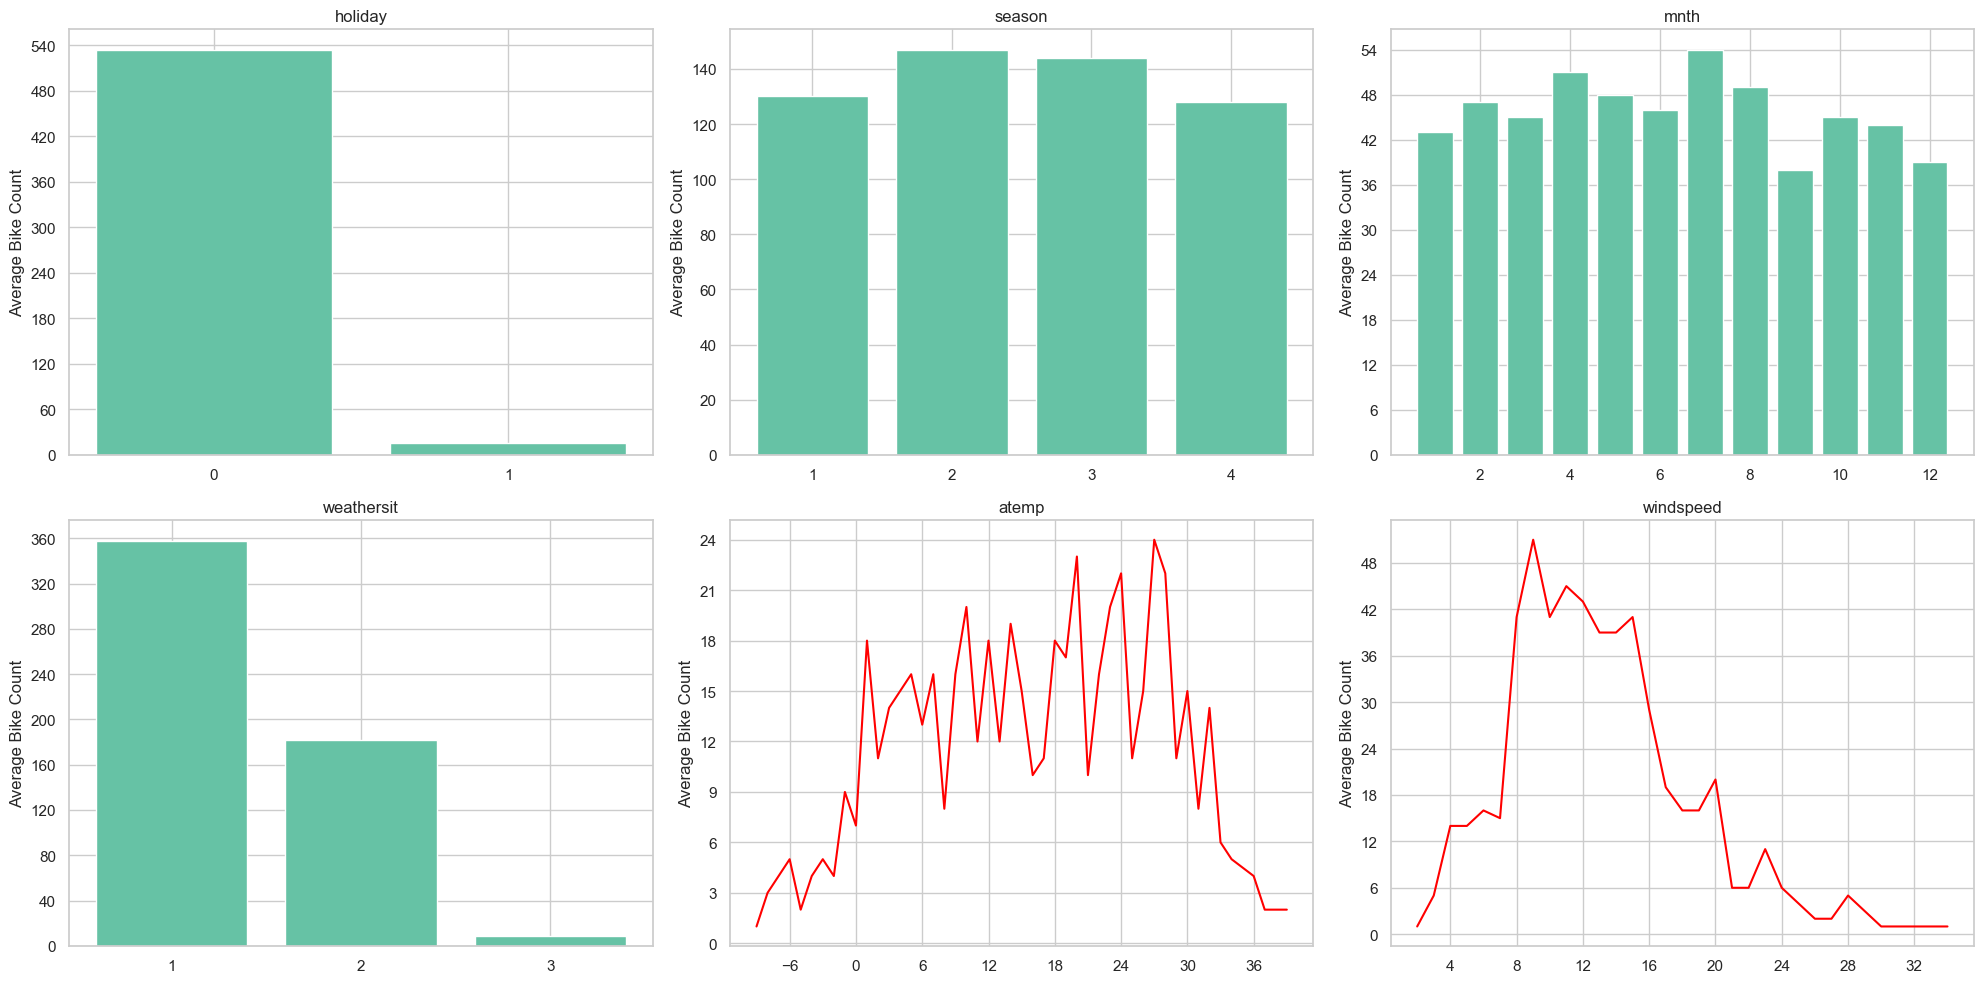

In [8]:
"""
Категориальные:
    season
    mnth
    holiday
    weekday
    workingday
    weathersit
Вещественные:
    temp
    atemp
    hum
    windspeed
    cnt (можно отнести к категориальных. (это, если что, вообще таргет.))
"""


def aggregator(feature: str,
               X: pd.DataFrame,
               y: pd.Series,
               transform=None) -> pd.DataFrame:
    """
    Универсальная функция для подсчёта количества (count) целевой переменной y
    в зависимости от значений признака feature.
    
    Параметр `transform` - это функция, которая при необходимости
    преобразует значения признака (например, для денормализации).
    Если transform=None, используется тождественное преобразование.
    """
    if transform is None:
        transform = lambda x: x  # без изменений

    data = transform(X[feature])
    df = pd.DataFrame({feature: data, 'y': y})

    agg_df = df.groupby(feature)['y'].count().reset_index()
    return agg_df


cat_features = ['holiday', 'season', 'mnth', 'weathersit']

num_features = {
    'atemp': lambda col: round(col * (50 - (-16)) + (-16)),
    # да, магические константы, взятые с сайта. Не хотел создавать новые переменные 
    'windspeed': lambda col: round(col * 67)
}

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
axes = axes.flatten()

for i, feat in enumerate(cat_features):
    agg_df = aggregator(feat, X_days_train, y_days_train)
    axes[i].bar(agg_df[feat], agg_df['y'])
    axes[i].set_title(feat)
    axes[i].set_ylabel('Average Bike Count')
    axes[i].xaxis.set_major_locator(mticker.MaxNLocator(integer=True))
    axes[i].yaxis.set_major_locator(mticker.MaxNLocator(integer=True))

start_idx = len(cat_features)
for j, (feat, func) in enumerate(num_features.items()):
    idx = start_idx + j
    agg_df = aggregator(feat, X_days_train, y_days_train, transform=func)
    axes[idx].plot(agg_df[feat], agg_df['y'], color='red')
    axes[idx].set_title(feat)
    axes[idx].set_ylabel('Average Bike Count')
    axes[idx].xaxis.set_major_locator(mticker.MaxNLocator(integer=True))
    axes[idx].yaxis.set_major_locator(mticker.MaxNLocator(integer=True))

plt.tight_layout()
plt.show()

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 4c1edb365b02e434e38deeb52b2096fa -->
Сделайте выводы по графикам. В частности, ответьте на следующие вопросы.
* Есть ли в данных явные выбросы, то есть точки, далеко находящиеся от основной массы точек?
* Стоит ли рассматривать какие-либо нелинейные функции от признаков? Не стоит придумывать сложные функции, достаточно рассмотреть $x^2$, $\log x$ и $I\{x > c\}$.



**Выводы по графикам:** Судя по графикам, значительное влияние оказывает, выходной день, или нет, качество погоды, а также скорость ветра и температура (вероятно, сильно коррелирует с параметром weathersist), в то время, как месяц и время года почти не влияют на количество арендованных велосипедов. 
В данных нет явных выбросов (не считаю скачки в выходных днях выбросом, это эмпирически подтверждающаяся закономерность. Скачки температуры, вероятно, вызваны округлением, или недостатком данных (возможно, в дни, когда температура была около 17 градусов (явное падение), был не выходной))
Квадраты и логарифмы можно рассматривать, если удостовериться (я еще не удостоверился), что, например, температура является около определяющим фактором (например, в дни, когда слишком холодно, никто не пойдет кататься). Логарифм можно применить к скорости ветра, чтобы сгладить большие значения. Индикатор полезен для отсечения аномальных температурных явлений (например, +35, -20)

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- e5fcb54a72af33e2c09b66124e63e5fc -->
#### 2. Подготовка данных

Опишите по шагам процедуру предобработки данных, которая будет включать работу с выбросами, преобразования вещественных и категориальных признаков, возможно, создание каких-либо новых признаков (посмотрите <a href="https://thetahat.ru/courses/ad/main/3/ad_linreg_sklearn">пример</a> с занятия). То, как именно выполнять подготовку данных, является целым исскуством. Здесь нет "правильного" подхода, здесь есть метрика качества на тестовом множестве, которая в последствии оценит качество вашей модели.

*Обратите внимание, от того, насколько качественно вы проведете визуальный анализ и подготовку данных, будет зависеть качество ваших моделей на следующих шагах.*

**Процедура предобработки данных:**

**a).** Работа с выбросами: еще вначале я отсек квантили, чтобы убрать сильно отличающиеся данные

Реализуйте данную процедуру.

In [9]:
# lower_bound = days_pd['cnt'].quantile(q=0.03)
# upper_bound = days_pd['cnt'].quantile(q=0.97)  # some small feature инжениринг
# days_pd = days_pd[(days_pd['cnt'] >= lower_bound) & (days_pd['cnt'] <= upper_bound)]

# сделал это в начале 

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- c5124704b109dacbd9cf5647f50eb72c -->
#### 3. Обучение модели и ее анализ

Обучите линейную регрессию из `sklearn` на полученных данных и посмотрите на полученные оценки коэффициентов (в т.ч. свободный коэффициент).

In [10]:
model = LinearRegression()
model.fit(X_days_train, y_days_train)

LinearRegression()

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 0e8e860f57fc7df75f236442f7206c78 -->
Посчитайте ошибку предсказания на тестовой выборке по метрикам RMSE, MAE, MAPE. Подробнее можно почитать в <a href="https://thetahat.ru/courses/ad/main/3/ad_linreg_sklearn">ноутбуке</a> с занятия.

*Замечание.* Если в тестовой части тоже есть "большие" выбросы, их стоит убрать. Наша модель не должна пытаться их предсказать (например, сбои в работе сервиса) но в то же время выбросы вносят существенный вклад в значение метрики. Особенно стоит обратить на это внимание в случае высоких значений метрик.

In [11]:
predictions = model.predict(X_days_test)

scores = pd.DataFrame({
    "RMSE": np.sqrt(mean_squared_error(y_days_test, predictions)),
    "MAE": mean_absolute_error(y_days_test, predictions),
    "MAPE": mean_absolute_percentage_error(y_days_test, predictions),
    "MSE": mean_squared_error(y_days_test, predictions),
    "R_Squared": r2_score(y_days_test, predictions)}, index=[0])

scores

,RMSE,MAE,MAPE,MSE,R_Squared
0,1198.231397,1028.375855,0.306748,1.435758e+06,0.55004


<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 82920a034ed2865f8a7e2f03eaabceb6 -->
Попробуйте посчитать оценку коэффициентов с помощью формулы, полученной на занятии. Не забудьте про константный признак. В чем заключается проблема?

*Подсказка.* Подумайте о зависимостях между признаками. Причем, возможно, вы уже могли решить эту проблему на предыдущих этапах. В таком случае посмотрите, что будет, если "вернуть" проблему.

In [34]:
X_train, X_test, y_train, y_test = np.array(X_days_train), np.array(X_days_test), np.array(y_days_train), np.array(y_days_test)
X_copy = np.full((X_train.shape[0], X_train.shape[1] + 1), fill_value=1.0) # добавляем биас
X_copy[:, :-1] = X_train
thetahat = np.linalg.inv(X_copy.T @ X_copy) @ X_copy.T @ y_train
X_copy_test = np.full((X_test.shape[0], X_test.shape[1] + 1), fill_value=1.0)
X_copy_test[:, :-1] = X_test
predictions = X_copy_test @ thetahat

scores = pd.DataFrame({
    "RMSE": np.sqrt(mean_squared_error(y_days_test, predictions)),
    "MAE": mean_absolute_error(y_days_test, predictions),
    "MAPE": mean_absolute_percentage_error(y_days_test, predictions),
    "R_Squared": r2_score(y_days_test, predictions)}, index=[0])

scores

,RMSE,MAE,MAPE,R_Squared
0,1244.997766,1053.09448,0.329718,0.514231


У меня проблема не возникает. Мне очевидно, что подразумевал автор: если некоторые признаки сильно линейно зависимы, то обратная матрица будет с огромными значениями (там же происходит деление на детерминант, по формуле Кронекера, а детерминант околонулевой). Для этого есть множество различных регуляризаций, но мне ничего не понадобилось: все работает не плохо и без них. 

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 56aff27d604dbe90dda7b28a8da4e2e9 -->
Исправьте эту проблему, посчитайте оценки коэффициентов, а также ошибку предсказания.

In [13]:
X_days_train.drop(['season', 'weathersit'], axis=1, inplace=True)
X_days_test.drop(['season', 'weathersit'], axis=1, inplace=True)

X_train, X_test, y_train, y_test = np.array(X_days_train), np.array(X_days_test), np.array(y_days_train), np.array(y_days_test)
thetahat = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train
predictions = X_test @ thetahat

scores = pd.DataFrame({
    "RMSE": np.sqrt(mean_squared_error(y_days_test, predictions)),
    "MAE": mean_absolute_error(y_days_test, predictions),
    "MAPE": mean_absolute_percentage_error(y_days_test, predictions),
    "R_Squared": r2_score(y_days_test, predictions)}, index=[0])

scores

,RMSE,MAE,MAPE,R_Squared
0,1295.137496,1089.898707,0.322235,0.474317


<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 52266029600cdfda3b1cfce9e68f5c99 -->
Сделайте выводы. А какие выводы? при дропе признаков, которые, кажутся, могут иметь линейную зависимость (очевидно, сезон и время года, (скорость ветра, температура) и качество погоды, (влажность, температура, скорость ветра) и ощущаемая температура и так далее, точность только уменьшается. Я не понимаю, чего от меня хотели

**Выводы:**

В принципе, точность достаточно печальная, и такая модель практически ни на что не годиться, лучше предсказывать, думая своей головой. Она сильно ошибается в среднем и никак не сможет предсказать, скажем, мероприятия, потому что, как минимум, их нет в датасете. Если кратко, такая модель не пригодна для проды. 


<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 00000000000000000000000000000000 -->
*Замечание.* Не расстраивайтесь, если у вас получится не очень хорошее качество, это нормально. Вы провели только небольшую предобработку данных и обучили *простую* модель. Более сложные методы обработки данных и обучения ждут вас впереди. Главное &mdash; с чего-то начать!

<img src="https://thetahat.ru/files/ad/main/3/bike2.png">

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 2c0205cf5ab3ec02c6ea667faa01e48b -->
---
### Задача 3.

*Перед выполнением задачи ознакомтесь с <a href="https://thetahat.ru/courses/ad/main/3/ad_logreg_sklearn">ноутбуком по логистической регрессии</a> с занятия.*

> Одно из интересных свойств модели логистической регрессии — *при соблюдении её предположений* она дает возможность получать **несмещенные оценки вероятностей** принадлежности объекта к определенному классу.  
> Для пояснения рассмотрим объект $x$ и соответствующее предсказание вероятности $\widehat{p}(x)$ для класса 1. Если взять небольшую окрестность объекта $x$, то доля объектов класса 1 в этой окрестности будет приблизительно равна $\widehat{p}(x)$.  

Далее проверим это свойство на конкретных примерах.

С помощью кода ниже сгенерируйте данные, состоящие из одного вещественного признака и бинарного таргета.

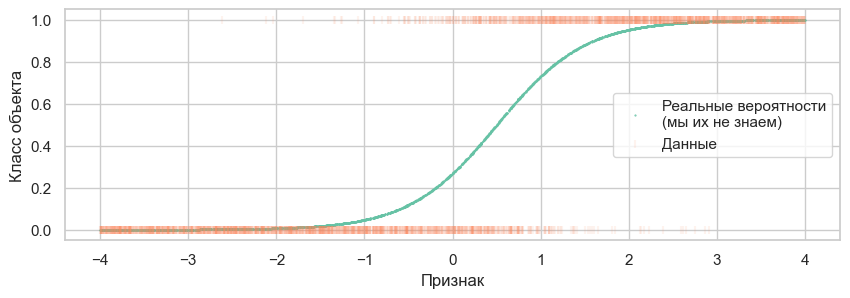

In [14]:
sample_size = 3000  # Размер выборки

# Признаки
X = np.random.uniform(low=-4, high=4, size=(sample_size, 1))

# Таргет
y_mean_true = 1 / (1 + np.exp(1 - 2 * X.ravel()))
y = np.random.binomial(n=1, p=y_mean_true)

plt.figure(figsize=(10, 3))
plt.scatter(X, y_mean_true, marker=".", s=1, label="Реальные вероятности\n(мы их не знаем)")
plt.scatter(X, y, marker="|", alpha=0.1, label="Данные")
plt.xlabel("Признак")
plt.ylabel("Класс объекта")
plt.legend();

Обучите логистическую регрессию, используя реализацию из `sklearn`, при этом свободный коэффициент должен присутствовать в модели. Укажите также `penalty='none'`.

In [36]:
model = LogisticRegression()
model.fit(X, y);

Напечатайте оценку коэффициентов

In [16]:
print("Коэффициенты:", model.coef_)
print("Свободный член:", model.intercept_)

Коэффициенты: [[2.02895714]]
Свободный член: [-0.97928916]


Ниже объявлена сетка значений признака. По этой сетке постройте
* предсказания классов,
* предсказания вероятностей класса 1.

Визуализируйте эти предсказания. На график стоит нанести также обучающую выборку.

In [17]:
X_grid = np.linspace(-4, 4, 10000).reshape((-1, 1))
model.predict(X_grid)

array([0, 0, 0, ..., 1, 1, 1])

Разбейте отрезок $[-4, 4]$ на одинаковые бины длины длины 0.2 и посчитайте в каждом бине долю объектов класса 1. Полученные значения добавьте на график предсказаний вероятностей и сравните эти графики. Проинтерпретируйте полученные результаты.

*Подсказка:* может помочь `np.digitize` и метод `groupby` для таблиц `pandas`. Рекомендуем посмотреть <a href="https://thetahat.ru/courses/python">обучающие ноутбуки</a> по библиотекам.

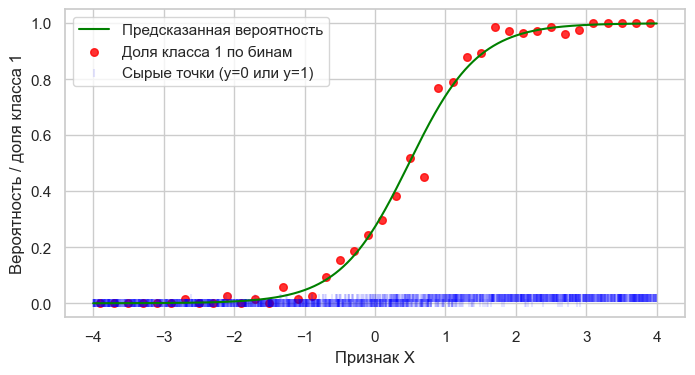

In [18]:
y_proba = model.predict_proba(X_grid)[:, 1]

# Разобьём признак X на бины шириной 0.2
bin_edges = np.arange(-4, 4.2, 0.2)
df = pd.DataFrame({"X": X.ravel(), "y": y})
df["bin"] = np.digitize(df["X"], bin_edges)

bin_stats = df.groupby("bin")["y"].mean().reset_index()

bin_centers = []
for b in bin_stats["bin"]:
    left_edge = bin_edges[b - 1]
    right_edge = bin_edges[b]
    bin_centers.append((left_edge + right_edge) / 2)
bin_stats["center"] = bin_centers

plt.figure(figsize=(8, 4))

plt.plot(X_grid, y_proba, color='green', label='Предсказанная вероятность')
plt.scatter(bin_stats["center"], bin_stats["y"], color='red', s=30,
            alpha=0.8, label='Доля класса 1 по бинам')
plt.scatter(X, y * 0.02, color='blue', alpha=0.1, marker='|',
            label='Сырые точки (y=0 или y=1)')

plt.xlabel("Признак X")
plt.ylabel("Вероятность / доля класса 1")
plt.grid(True)
plt.legend()
plt.show()

Повторите проведенное исследование для следующих данных и сравните результаты.

Коэффициенты: [[8.28019689]]
Свободный член: [0.04428001]


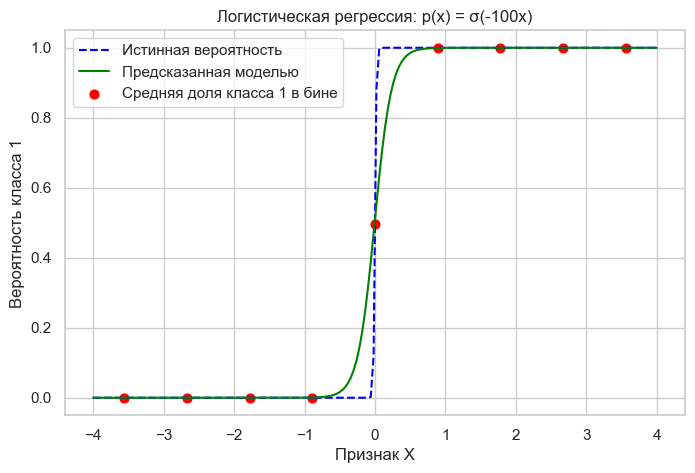

In [49]:
X = np.random.uniform(low=-4, high=4, size=(sample_size, 1))

y_mean_true = 1 / (1 + np.exp(-100 * X.ravel()))
y = np.random.binomial(n=1, p=y_mean_true)

model = LogisticRegression()
model.fit(X, y)

print("Коэффициенты:", model.coef_)
print("Свободный член:", model.intercept_)

X_grid = np.linspace(-4, 4, 200).reshape(-1, 1)
y_prob = model.predict_proba(X_grid)[:, 1]

# Истинная вероятность на сетке
y_prob_true = 1 / (1 + np.exp(-100 * X_grid.ravel()))

df = pd.DataFrame({'X': X.ravel(), 'y': y})
bin_edges = np.linspace(-4, 4, 10)   # 9 интервалов
df['bin'] = np.digitize(df['X'], bin_edges)

bin_stats = df.groupby('bin')['y'].mean().reset_index()

def bin_center(b):
    if 1 <= b < len(bin_edges):
        left_edge = bin_edges[b - 1]
        right_edge = bin_edges[b]
        return 0.5 * (left_edge + right_edge)
    else:
        return np.nan

bin_stats['center'] = bin_stats['bin'].apply(bin_center)
bin_stats = bin_stats.dropna()

plt.figure(figsize=(8,5))

plt.plot(X_grid, y_prob_true, 'b--', label='Истинная вероятность')

plt.plot(X_grid, y_prob, 'g', label='Предсказанная моделью')

plt.scatter(bin_stats['center'], bin_stats['y'],
            color='red', s=40, alpha=1.0, marker='o',
            label='Средняя доля класса 1 в бине')

plt.title('Логистическая регрессия: p(x) = σ(-100x)')
plt.xlabel('Признак X')
plt.ylabel('Вероятность класса 1')
plt.grid(True)
plt.legend()
plt.show()

**Выводы:**

Логистическая регрессия хорошо восстанавливает «истинные» параметры, когда в данных есть достаточно точек в области перехода сигмоиды от 0 к 1 (иначе говоря, когда признак 
x покрывает интервал, где функция вероятности существенно меняется).
Если «настоящая» сигмоида сдвинута так, что на всём доступном диапазоне x вероятность почти 0 (или почти 1), регрессия не может адекватно оценить наклон и сдвиг — данные просто не содержат нужной вариации. В итоге модель «видит» почти одни нули (или единицы) и даёт практически константный прогноз.

---
### Задача 4.

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- f92a2876d3f2b0d01fc396776be023a9 -->
Продолжим исследовать модель логистической регрессии. Сгенерируем данные, состоящие из двух бинарных признаков и бинарного таргета

In [20]:
probs = np.random.uniform(size=8)
probs /= probs.sum()
probs

x = np.random.choice(np.arange(8), p=probs, size=10000)
data = pd.DataFrame(
    np.unpackbits(np.array(x.reshape(-1, 1), dtype=">i8").view(np.uint8), axis=1)[:, -3:],
    columns=["feature_1", "feature_2", "target"],
)
data.head()

,feature_1,feature_2,target
0,1,1,1
1,1,0,0
2,1,0,0
3,0,0,0
4,1,1,0


Особенность таких данных &mdash; конечное число *возможных различных* объектов. В данном случае их всего 4, по количеству всех возможных комбинаций значений признака. Соответственно, любой моделью мы можем сделать только 4 *различных* предсказания. Исследуем, как с этим справляется логистическая регрессия.

Сначала для сравнения посчитайте долю класса 1 для каждой категории объектов.

*Подсказка:* используйте `pd.pivot_table`. Рекомендуем посмотреть <a href="https://thetahat.ru/courses/python">обучающие ноутбуки</a> по библиотекам.

In [60]:
pivot_result = pd.pivot_table(
    data,
    values='target',    
    index='feature_1',  
    columns='feature_2',
    aggfunc='mean'      
)

pivot_result

feature_2,0,1
feature_1,,
0,0.337766,0.688647
1,0.041553,0.361217


<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 14e68d57d58f901b3350e63f76b9f8db -->
Обучите логистическую регрессию с `penalty='none'` и получите предсказания вероятностей для этих четырех типов объектов. Представьте результаты в таком виде, чтобы их удобно было сравнивать с частотами, посчитанными ранее.

In [62]:
empirical = pd.pivot_table(
    data,
    values='target',
    index='feature_1',
    columns='feature_2',
    aggfunc='mean'
)
print("Эмпирические частоты для каждой комбинации:")
print(empirical)

X = data[['feature_1', 'feature_2']]
y = data['target']

model = LogisticRegression(penalty=None, solver='lbfgs')
model.fit(X, y)

combinations = pd.DataFrame({
    'feature_1': [0, 0, 1, 1],
    'feature_2': [0, 1, 0, 1]
})

combinations['pred_prob'] = model.predict_proba(combinations)[:, 1]

predicted = combinations.pivot(index='feature_1', columns='feature_2', values='pred_prob')
print("\nПредсказанные вероятности модели:")
print(predicted)

Эмпирические частоты для каждой комбинации:
feature_2         0         1
feature_1                    
0          0.337766  0.688647
1          0.041553  0.361217

Предсказанные вероятности модели:
feature_2         0         1
feature_1                    
0          0.314243  0.729188
1          0.080724  0.340360


<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 1b868a951c9dec0be47540d5316f7e9f -->
Почему результаты не совпадают?

Для ответа на этот вопрос распишите формулу, которая задает модель логистической регрессии, указав все параметры. Какое предположение о данных при этом делает логистическая регрессия?

Логистическая регрессия строит модель вида

$$
p(y=1\mid x)=\frac{1}{1+\exp\bigl(-(\beta_0+\beta_1x_1+\beta_2x_2)\bigr)},
$$

что эквивалентно записи

$$
\log\frac{p(y=1\mid x)}{1-p(y=1\mid x)}=\beta_0+\beta_1x_1+\beta_2x_2.
$$

Модель предполагает, что логарифм отношения шансов линейно зависит от признаков. Эмпирические частоты для каждой комбинации рассчитываются напрямую и могут не вписываться в такую линейную структуру, поэтому предсказания модели отличаются от наблюдаемых долей.


<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 1180c36f8ac39574c944b19ddee07271 -->
Предложите и реализуйте способ построения модели логистической регрессии так, чтобы она точнее предсказывала частоты, посчитанные ранее.

Опишите ваше предложение:

Просто преобразовать пару бинарных признаков в единую категориальную переменную с 4‑ю уровнями (соответствующими всем возможным комбинациям), а затем применить one‑hot кодирование этой переменной. При обучении такая модель максимально точно воспроизводит наблюдаемые частоты.

Реализация:

In [64]:
data['group'] = data['feature_1'].astype(str) + '_' + data['feature_2'].astype(str)

X_dummy = pd.get_dummies(data['group'], drop_first=True)
y = data['target']

model_dummy = LogisticRegression(penalty=None, solver='lbfgs')
model_dummy.fit(X_dummy, y)

groups = pd.DataFrame({'group': ['0_0', '0_1', '1_0', '1_1']})
X_groups = pd.get_dummies(groups['group'], drop_first=True)

for col in X_dummy.columns:
    if col not in X_groups.columns:
        X_groups[col] = 0
X_groups = X_groups[X_dummy.columns]

groups['pred_prob'] = model_dummy.predict_proba(X_groups)[:, 1]

print("Предсказанные вероятности для каждой группы:")
print(groups)

Предсказанные вероятности для каждой группы:
  group  pred_prob
0   0_0   0.337774
1   0_1   0.688594
2   1_0   0.041621
3   1_1   0.361236


<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 3f951c224a4ac471c658ed7755ff9521 -->
**Выводы:**

Эмпирические частоты для 4 комбинаций признаков дают точное распределение долей класса 1.
Стандартная логистическая регрессия с линейной зависимостью log-odds 
    $$\log\frac{p}{1-p}=\beta_0+\beta_1x_1+\beta_2x_2$$ 
    не может точно воспроизвести эти частоты из-за ограниченности модели.
Преобразование двух бинарных признаков в одну категориальную с последующим one-hot кодированием позволяет модели назначить отдельный параметр для каждой группы, что улучшает соответствие предсказаний эмпирическим частотам.


<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 00000000000000000000000000000000 -->
---
### <font color="orange"><i>Сложная часть</i></font>

Задачи 5-7: скачайте второй ноутбук с условием задания со страницы курса.